###  Step 0: 

- Subset on 'lower' : Split test & train


In [3]:
import pandas as pd

lm='/home/icarus/mount_data/cat_and_att_pred/anno/list_landmarks.txt'
text=pd.read_csv(lm,delim_whitespace=True,skiprows=0,header=1)


lower=text[text.clothes_type ==1]

l=[u'image_name', u'variation_type',
       u'landmark_visibility_1', u'landmark_location_x_1',
       u'landmark_location_y_1', u'landmark_visibility_2',
       u'landmark_location_x_2', u'landmark_location_y_2',
       u'landmark_visibility_3', u'landmark_location_x_3',
       u'landmark_location_y_3', u'landmark_visibility_4',
       u'landmark_location_x_4', u'landmark_location_y_4',
       u'landmark_visibility_5', u'landmark_location_x_5',
       u'landmark_location_y_5', u'landmark_visibility_6',
       u'landmark_location_x_6', u'landmark_location_y_6',
       u'landmark_visibility_7', u'landmark_location_x_7',
       u'landmark_location_y_7', u'landmark_visibility_8',
       u'landmark_location_x_8', u'landmark_location_y_8',u'clothes_type']
lower.columns=l
lower.head(2)

,image_name,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,landmark_location_x_3,...,landmark_visibility_6,landmark_location_x_6,landmark_location_y_6,landmark_visibility_7,landmark_location_x_7,landmark_location_y_7,landmark_visibility_8,landmark_location_x_8,landmark_location_y_8,clothes_type
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,1,0,146,102,0,173,95,0,94,...,0.0,177.0,232.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,1,0,107,67,0,122,67,0,79,...,0.0,134.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


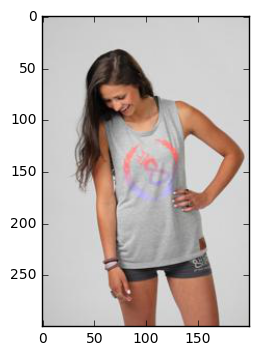

In [32]:
# looks like visibility on sleeves is inconsistent : visible ? 

from scipy import ndimage
from matplotlib import pyplot as plt

base='/home/icarus/mount_data/'
file1=ndimage.imread(base+'img/Boxy_Ombr&eacute;_Tee/img_00000051.jpg')
plt.imshow(file1)
plt.show()

In [28]:
# look at invisibilies  -  seem sane for 

test=lower[(lower.landmark_visibility_3==0)&(lower.landmark_visibility_4==0)]
test.tail(20)

,image_name,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,landmark_location_x_3,...,landmark_visibility_6,landmark_location_x_6,landmark_location_y_6,landmark_visibility_7,landmark_location_x_7,landmark_location_y_7,landmark_visibility_8,landmark_location_x_8,landmark_location_y_8,clothes_type
139680,img/Boxy_Ombr&eacute;_Tee/img_00000051.jpg,1,0,81,104,0,112,90,0,62,...,0.0,158.0,227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139682,img/Boxy_Ombr&eacute;_Tee/img_00000053.jpg,1,1,93,105,0,147,89,0,64,...,0.0,162.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139683,img/Boxy_Ombr&eacute;_Tee/img_00000054.jpg,1,0,112,93,0,161,82,0,79,...,0.0,186.0,242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139684,img/Boxy_Ombr&eacute;_Tee/img_00000055.jpg,1,0,122,58,0,158,52,0,102,...,0.0,196.0,179.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139685,img/Abstract_Geo_Print_Top/img_00000001.jpg,1,0,86,53,0,97,50,0,42,...,0.0,130.0,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139686,img/Abstract_Geo_Print_Top/img_00000002.jpg,1,0,125,67,0,155,61,0,123,...,0.0,157.0,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139687,img/Abstract_Geo_Print_Top/img_00000003.jpg,1,1,81,59,1,101,58,0,71,...,0.0,113.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139689,img/Abstract_Geo_Print_Top/img_00000005.jpg,1,0,97,89,0,129,88,0,60,...,0.0,179.0,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139694,img/Abstract_Geo_Print_Top/img_00000010.jpg,1,0,111,105,0,160,100,0,85,...,0.0,190.0,251.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139695,img/Abstract_Geo_Print_Top/img_00000011.jpg,1,0,91,97,0,127,95,0,58,...,0.0,160.0,264.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
lower2=lower[(lower.landmark_visibility_1==1)&(lower.landmark_visibility_2!=2)&(lower.landmark_visibility_3!=2)&
            (lower.landmark_visibility_4!=2)]

In [6]:
lower2.describe()

,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,landmark_location_x_3,landmark_location_y_3,...,landmark_visibility_6,landmark_location_x_6,landmark_location_y_6,landmark_visibility_7,landmark_location_x_7,landmark_location_y_7,landmark_visibility_8,landmark_location_x_8,landmark_location_y_8,clothes_type
count,137822.0,137822.000000,137822.000000,137822.000000,137822.000000,137822.000000,137822.000000,137822.000000,137822.000000,137822.000000,...,137822.000000,137822.000000,137822.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.0,0.150832,100.654039,71.898550,0.137859,136.564213,71.220255,0.090421,70.418627,150.342797,...,0.079653,144.727765,214.094419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.357887,32.003217,29.327566,0.344753,35.132618,29.331722,0.286785,39.216291,66.785928,...,0.338776,44.573096,57.681475,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,0.000000,5.000000,1.000000,0.000000,10.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.0,0.000000,80.000000,52.000000,0.000000,114.000000,52.000000,0.000000,45.000000,98.000000,...,0.000000,121.000000,184.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.0,0.000000,95.000000,76.000000,0.000000,131.000000,76.000000,0.000000,64.000000,140.000000,...,0.000000,142.000000,226.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.0,0.000000,118.000000,92.000000,0.000000,160.000000,91.000000,0.000000,87.000000,205.000000,...,0.000000,172.000000,256.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.0,1.000000,294.000000,294.000000,1.000000,290.000000,293.000000,1.000000,297.000000,300.000000,...,2.000000,299.000000,300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
l=lower2[lower2.landmark_visibility_3]

In [ ]:
from scipy import ndimage



In [5]:


file1='/home/icarus/mount_data/cat_and_att_pred/eval/list_eval_partition.txt'

split=pd.read_csv(file1,delim_whitespace=True,skiprows=[0])

splits=split.merge(lower2)

splits.head(1)

len(lower)

139709

In [7]:
def split(x):
    breaks=x.split('/')
    return breaks[1]



#splits['path']=splits.image_name.apply(split)
splits['folder']=splits.image_name.apply(split)
splits.head()

,image_name,evaluation_status,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,...,landmark_location_x_6,landmark_location_y_6,landmark_visibility_7,landmark_location_x_7,landmark_location_y_7,landmark_visibility_8,landmark_location_x_8,landmark_location_y_8,clothes_type,folder
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train,1,0,146,102,0,173,95,0,...,177.0,232.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train,1,0,107,67,0,122,67,0,...,134.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val,1,0,101,79,0,116,76,0,...,118.0,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train,1,0,96,74,0,113,72,0,...,120.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test,1,1,102,106,0,116,102,0,...,137.0,246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse


In [8]:
def split2(x):
    breaks=x.split('/')
    return "/".join(breaks[1:])



#splits['path']=splits.image_name.apply(split)
splits['path']=splits.image_name.apply(split2)
splits.head()

,image_name,evaluation_status,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,...,landmark_location_y_6,landmark_visibility_7,landmark_location_x_7,landmark_location_y_7,landmark_visibility_8,landmark_location_x_8,landmark_location_y_8,clothes_type,folder,path
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train,1,0,146,102,0,173,95,0,...,232.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000001.jpg
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train,1,0,107,67,0,122,67,0,...,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000002.jpg
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val,1,0,101,79,0,116,76,0,...,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000003.jpg
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train,1,0,96,74,0,113,72,0,...,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000004.jpg
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test,1,1,102,106,0,116,102,0,...,246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000005.jpg


In [12]:
test=splits[:100]

test.head()

,image_name,evaluation_status,variation_type,landmark_visibility_1,landmark_location_x_1,landmark_location_y_1,landmark_visibility_2,landmark_location_x_2,landmark_location_y_2,landmark_visibility_3,...,landmark_location_y_6,landmark_visibility_7,landmark_location_x_7,landmark_location_y_7,landmark_visibility_8,landmark_location_x_8,landmark_location_y_8,clothes_type,folder,path
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train,1,0,146,102,0,173,95,0,...,232.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000001.jpg
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train,1,0,107,67,0,122,67,0,...,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000002.jpg
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val,1,0,101,79,0,116,76,0,...,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000003.jpg
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train,1,0,96,74,0,113,72,0,...,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000004.jpg
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test,1,1,102,106,0,116,102,0,...,246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sheer_Pleated-Front_Blouse,Sheer_Pleated-Front_Blouse/img_00000005.jpg


In [13]:
import os
from shutil import copyfile

for i in test.index:
    my_file='/home/icarus/mount_data/img/'+test.path[i]
    new_file='/home/icarus/mount_data/lower2/'+test.evaluation_status[i]+'/'+test.folder[i]
    new_path='/home/icarus/mount_data/lower2/'+test.evaluation_status[i]+'/'+test.path[i]
    if not os.path.exists(new_file):
        os.makedirs(new_file)
    try:
        copyfile(my_file,new_path)
    except:
        print new_path
    
    

In [14]:
import os
from shutil import copyfile

for i in splits.index:
    my_file='/home/icarus/mount_data/img/'+splits.path[i]
    new_file='/home/icarus/mount_data/lower2/'+splits.evaluation_status[i]+'/'+splits.folder[i]
    new_path='/home/icarus/mount_data/lower2/'+splits.evaluation_status[i]+'/'+splits.path[i]
    if not os.path.exists(new_file):
        os.makedirs(new_file)
    #try:
    copyfile(my_file,new_path)
    #except:
        #pass
    

#### Design:
The FashionNet structure: very similiar to traditional VGG; 
except for the final convolutional layer - which has been designed for clothes.

Last convolutional layer: replaced by (3 branches: of layers) 
a) Blue Branch: predicts landmark locations as well as their visibility
(have they been occluded?)

Landmark Pooling Layer: 
Inputs are features maps (conv4) & labels: estimated landmarks

a) For each landmark location (l), we determine visibility (v).  The responses of invisible 
landmarks are gated to 0

b) We perform max-pooling inside the region and (l) to obtain local feature maps.  
Back-prop of landmark pooling is similar to the ROI pooling layer introduced in [8]
Instead of treating regions independently, the landmark pooling layer captures interaction 
between clothing landmarks by concatenating local features

In [22]:
def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu',name='conv1_1'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu',name='conv1_2'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    #model.add(MaxPooling2D((2,2), strides=(2,2)))

    return model

In [23]:
loc = VGG_16()
loc.add(Dense(8,activation='linear',name='location'))

In [ ]:
vis1=VGG_16()
vis1.add(Dense(2,activation='softmax',name='visibility1'))



In [22]:
from keras import metrics


sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy',metrics=[metrics.top_k_categorical_accuracy])

In [23]:
from keras.preprocessing import image

train_gen= keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    dim_ordering=K.image_dim_ordering())

In [24]:
train_generator = train_gen.flow_from_directory(
        '/home/ubuntu/mount_point/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_datagen = keras.preprocessing.image.ImageDataGenerator()
validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/mount_point/test',
        target_size=(224,224),
        batch_size=32)

Found 214217 images belonging to 5596 classes.
Found 72288 images belonging to 5596 classes.


In [25]:
# Refine for our application
model.layers.pop()
model.add(Dropout(0.5))
model.add(Dense(5596))
model.add(Activation('softmax'))

sgd=SGD(lr=.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=[metrics.top_k_categorical_accuracy])

In [ ]:
# GPU is about 100 x faster than non GPU, I guess all of this effort was worth it~ (started 3:30?)
# 10937 gpu usage
model.fit_generator(
        train_generator,
        samples_per_epoch=train_generator.nb_sample,
        nb_epoch=10,
        nb_val_samples=validation_generator.nb_sample,
        validation_data=validation_generator)
model.save('my_weights.h5')

Epoch 1/10
 11424/214217 [>.............................] - ETA: 25615s - loss: 8.6287 - top_k_categorical_accuracy: 0.0011

In [ ]:
model.save('my_weights.h5')

#### Findings:

- We dont need to have power of 2 batch sizes (just seems to be common practice)
- It is a good idea to rescale images to some power of 2. .. because of pooling ? (might want to change mine to 256? )
